# Import the necesary Libraries

In [2]:
data = pd.read_csv('/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt', sep=';', 
                 parse_dates=[['Date','Time']], infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'])
data.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date_Time              datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


# Splitting Date_Time column into separate columns like year, month, day..etc.

In [7]:
data['year'] = pd.DatetimeIndex(data['Date_Time']).year
data['month'] = pd.DatetimeIndex(data['Date_Time']).month
data['day'] = pd.DatetimeIndex(data['Date_Time']).day
data['hour'] = pd.DatetimeIndex(data['Date_Time']).hour
data['minutes'] = pd.DatetimeIndex(data['Date_Time']).minute
data.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,hour,minutes
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,24
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,25
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,26
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,27
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,28


# Dropping Date_Time column:-

In [8]:
df = data.drop('Date_Time',axis=1)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,hour,minutes
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,24
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,25
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,26
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,27
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,28


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   year                   int64  
 8   month                  int64  
 9   day                    int64  
 10  hour                   int64  
 11  minutes                int64  
dtypes: float64(7), int64(5)
memory usage: 190.0 MB


# Import pycaret library to choose the best regression algorithm that fits the dataset

In [12]:
import pycaret
from pycaret.regression import *  

In [17]:
reg = setup(data = df, target = 'Global_active_power',numeric_imputation='mean', categorical_features = None)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3840
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(2075259, 12)"
4,Missing Values,True
5,Numeric Features,9
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [18]:
compare_models()

IntProgress(value=0, description='Processing: ', max=245)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:04:21
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Model
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0256,0.0016,0.0403,0.9985,0.0190,0.0459
1,Ridge Regression,0.0256,0.0016,0.0403,0.9985,0.0190,0.0459
2,Least Angle Regression,0.0256,0.0016,0.0403,0.9985,0.0190,0.0458
3,Bayesian Ridge,0.0256,0.0016,0.0403,0.9985,0.0190,0.0459
4,Orthogonal Matching Pursuit,0.0297,0.0021,0.0454,0.9982,0.0205,0.0476
5,Passive Aggressive Regressor,0.0427,0.0031,0.0549,0.9972,0.0277,0.0788
6,Elastic Net,0.1031,0.0214,0.1463,0.9808,0.0600,0.1992
7,Lasso Regression,0.1685,0.0537,0.2318,0.9519,0.0969,0.3412
8,Lasso Least Angle Regression,0.8183,1.1166,1.0567,-0.0000,0.4404,1.6937


KeyboardInterrupt: 

In [19]:
lr_model = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0256,0.0016,0.0404,0.9985,0.0191,0.0461
1,0.0256,0.0016,0.0402,0.9986,0.0190,0.0459
2,0.0256,0.0016,0.0399,0.9986,0.0189,0.0458
3,0.0256,0.0016,0.0402,0.9985,0.0191,0.0461
4,0.0254,0.0016,0.0396,0.9986,0.0188,0.0456
5,0.0257,0.0016,0.0403,0.9985,0.0191,0.0456
6,0.0257,0.0016,0.0404,0.9985,0.0191,0.0459
7,0.0258,0.0017,0.0409,0.9985,0.0193,0.0462
8,0.0257,0.0016,0.0404,0.9985,0.0191,0.0458
9,0.0256,0.0016,0.0402,0.9986,0.0190,0.0458


# Hyper-parameter Tuning

In [20]:
tuned_lr = tune_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0256,0.0016,0.0404,0.9985,0.0191,0.0461
1,0.0256,0.0016,0.0402,0.9986,0.0190,0.0459
2,0.0256,0.0016,0.0399,0.9986,0.0189,0.0458
3,0.0256,0.0016,0.0402,0.9985,0.0191,0.0461
4,0.0254,0.0016,0.0396,0.9986,0.0188,0.0456
5,0.0257,0.0016,0.0403,0.9985,0.0191,0.0456
6,0.0257,0.0016,0.0404,0.9985,0.0191,0.0459
7,0.0258,0.0017,0.0409,0.9985,0.0193,0.0462
8,0.0257,0.0016,0.0404,0.9985,0.0191,0.0458
9,0.0256,0.0016,0.0402,0.9986,0.0190,0.0458


In [22]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

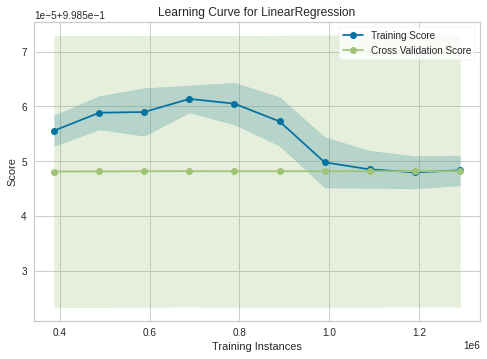

In [23]:
plot_model(estimator = tuned_lr, plot = 'learning')

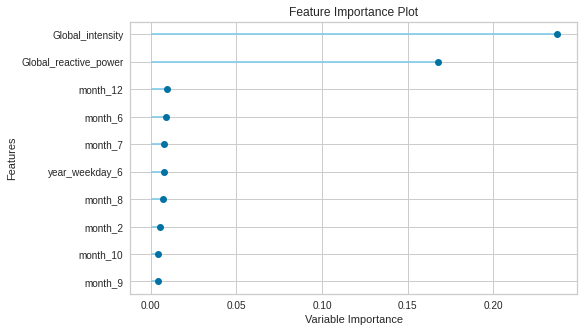

In [24]:
plot_model(estimator = tuned_lr, plot = 'feature')